In [24]:
import os

gpu_id=0
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]=str(gpu_id)

from PoisDenoiser.utils import show_images as show, show_losses

% matplotlib inline
%load_ext autoreload
%autoreload 2

from PoisDenoiser.networks.PoisNet.net import PoisNet
from PoisDenoiser.dataset_loader import BSDS500
import torch as th
from torch.utils.data import DataLoader

from IPython.display import clear_output
from time import sleep
from pydl.nnLayers.functional.functional import grbf_LUT
grbf = grbf_LUT.apply
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


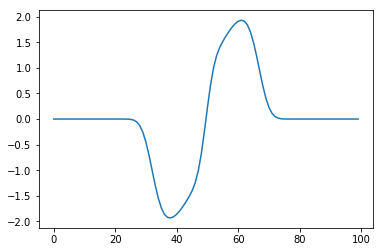

KeyboardInterrupt: 

In [25]:
s=1
c=1

model = PoisNet(output_features=c, stages=s).cuda()

for epoch in range(10,1000, 10):

    exp_name = 's{}c{}'.format(s,c)
    state = th.load('./PoisDenoiser/networks/PoisNet/models/'+exp_name+\
                    '/state_{}.pth'.format(epoch),\
                   map_location=lambda storage,loc:storage.cuda())

    model.load_state_dict(state['model_state_dict'])

    inputs = th.linspace(-100,100, 100)
    outs = []
    rbf_weights = model.resRBFPois[0].rbf_weights.cpu()
    rbf_centers = model.resRBFPois[0].rbf_centers
    rbf_precision = model.resRBFPois[0].rbf_precision
    data_lut = model.rbf_data_lut.cpu()

    for input in inputs:
        out = grbf(input, rbf_weights, rbf_centers, rbf_precision, data_lut)
        outs.append(out)

    plt.plot(outs);
    plt.show()
    sleep(0.5)
    clear_output()

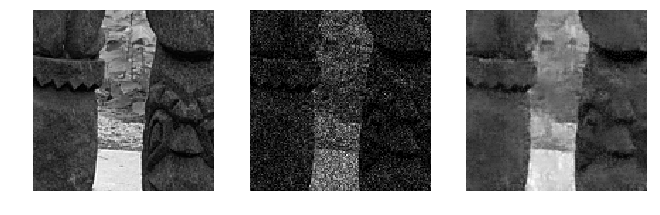

In [98]:
ind = 0
show([gt[ind].unsqueeze(0), noisy[ind].unsqueeze(0), model(noisy[ind].unsqueeze(0),noisy[ind].unsqueeze(0)).detach()])